In [1]:
import qiskit 
from qiskit.visualization import plot_bloch_multivector,plot_histogram
import numpy as np
from math import pi
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ

In [2]:
def initstate(qc,x,y,z):
    qc.initialize(x,0)
    qc.initialize(y,1)
    qc.initialize(z,2)
    
    return;
    

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  after removing the cwd from sys.path.
/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """
/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  


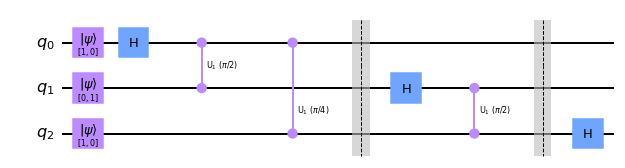

In [3]:
qc1 = qiskit.QuantumCircuit(3)
initstate(qc1,[1,0],[0,1],[1,0])
qc1.h(0)
qc1.cu1(pi/2,1,0)
qc1.cu1(pi/4,2,0)
qc1.barrier()
qc1.h(1)
qc1.cu1(pi/2,2,1)
qc1.barrier()
qc1.h(2)
qc1.draw('mpl')




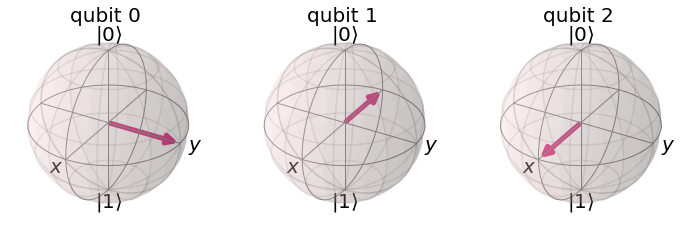

In [4]:
simulator = qiskit.Aer.get_backend('statevector_simulator')
statevector = qiskit.execute(qc1,simulator).result().get_statevector()
plot_bloch_multivector(statevector)

# General Circuit

In [5]:
def qft_trans(qc,n):
    for i in range(n):
        qc.h(i)
        for j in range(i+1,n): 
            qc.cu1(pi/2**(j-i),j,i)
#         qc.barrier()


In [6]:
def init_qc(qc,vectors):
    for i,x in enumerate(vectors):
        qc.initialize(x,i)
    

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


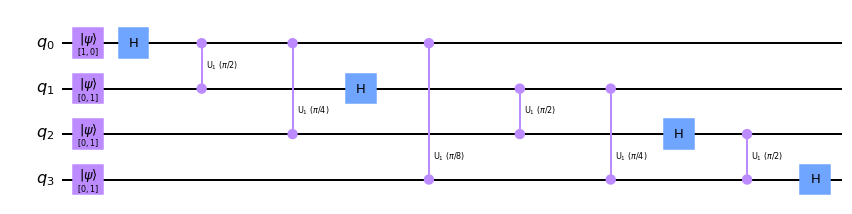

In [7]:
def qft_circuit(n,v):
    qc = qiskit.QuantumCircuit(n)
    init_qc(qc,v)
    qft_trans(qc,n)
    return qc


v=[[1,0],[0,1],[0,1],[0,1]]
qc=qft_circuit(4,v)
qc.draw('mpl')

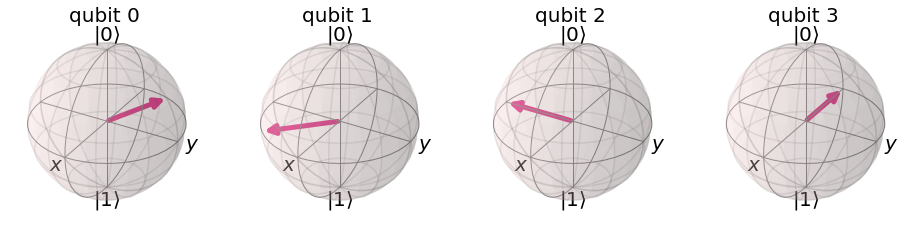

In [8]:
statevector = qiskit.execute(qc,simulator).result().get_statevector()
plot_bloch_multivector(statevector)

# Running on real quantum computer (IBM) 

As the results will random according to the probabilites of the qubits. but we can invert the QFT circuit and append it with QFt circuit and then we can verify if we get the initial number

** i wanted to use .initialize() to input my intial state of the qubits but .inverse() method does not work if I do so, i dont know why. as a wordaround I m initializing my intial state using X gate 

In [9]:
def init_qc3(bits,n):
    qc = qiskit.QuantumCircuit(bits)
    bi = bin(n)
    for i in range(2,len(bi)):
        if  bi[i]=='1':
            qc.x(i-2)
    return qc
        

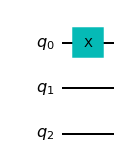

In [10]:

qc3=init_qc3(3,4)
qc3.draw('mpl')

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


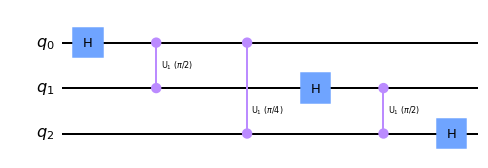

In [11]:
qc_trans = qiskit.QuantumCircuit(3)
qft_trans(qc_trans,3)
qc_trans.draw('mpl')

In [12]:
inv = qc_trans.inverse()

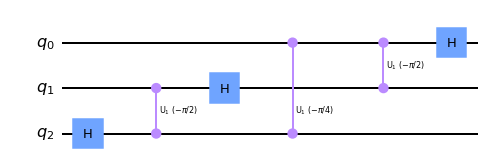

In [13]:
inv.draw('mpl')

In [14]:
qc3.barrier()
qc3=qc3.combine(qc_trans)
qc3.barrier()
qc3=qc3.combine(inv)


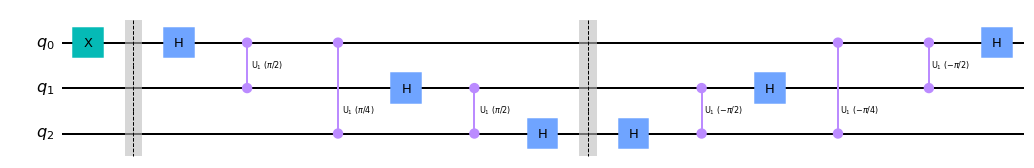

In [15]:
qc3.draw('mpl')

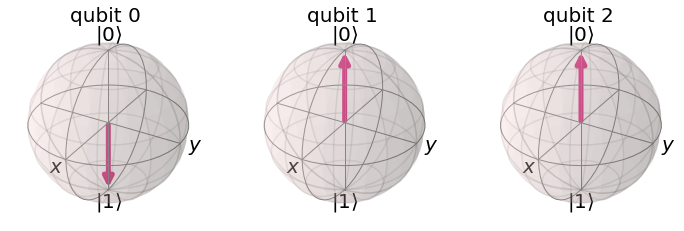

In [16]:
statevector = qiskit.execute(qc3,simulator).result().get_statevector()
plot_bloch_multivector(statevector)

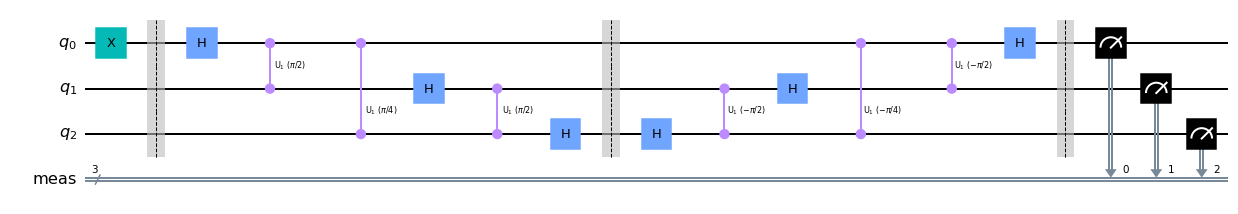

In [17]:
qc3.measure_all()
qc3.draw('mpl')

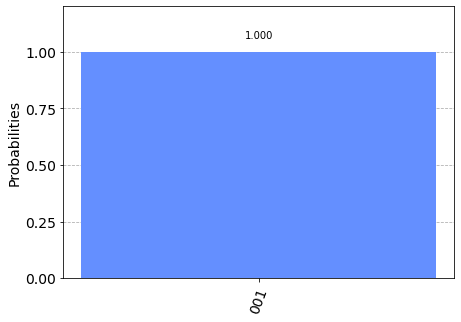

In [18]:
qasmsim = qiskit.Aer.get_backend('qasm_simulator')
counts= qiskit.execute(qc3,qasmsim).result().get_counts()
plot_histogram(counts)